
# K-Nearest Neighbors


*   Use K Nearest neighbors to classify data


**K-Nearest Neighbors** is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.


### How does K-NN work?

The K-NN working can be explained on the basis of the below algorithm:

* Step-1: Select the number K of the neighbors
* Step-2: Calculate the Euclidean distance of K number of neighbors
* Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.
* Step-4: Among these k neighbors, count the number of the data points in each category.
* Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.
* Step-6: Our model is ready.
* Suppose we have a new data point and we need to put it in the required category. Consider the below image:

### Here's an visualization of the K-Nearest Neighbors algorithm.

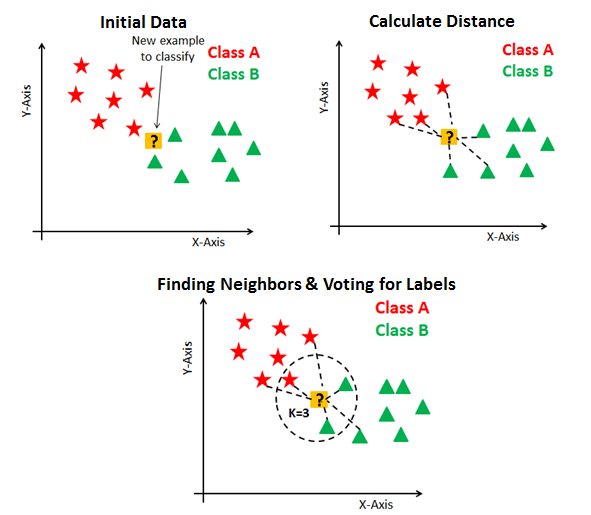


In this case, we have data points of Class A and B. We want to predict what the star (test data point) is. If we consider a k value of 3 (3 nearest data points), we will obtain a prediction of Class B. Yet if we consider a k value of 6, we will obtain a prediction of Class A.


In this sense, it is important to consider the value of k. Hopefully from this diagram, you should get a sense of what the K-Nearest Neighbors algorithm is. It considers the 'K' Nearest Neighbors (data points) when it predicts the classification of the test point.


### How to Calculate The distance
* <b>Euclidean distance
    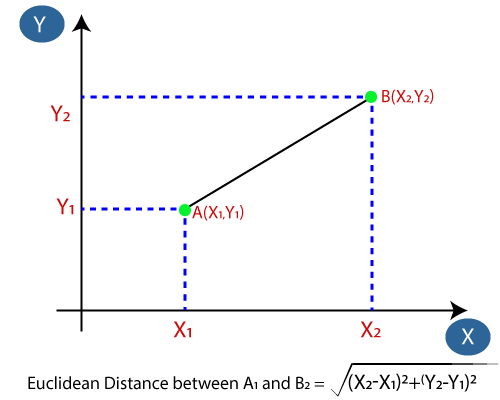
* <b>Manhattan distance  
   

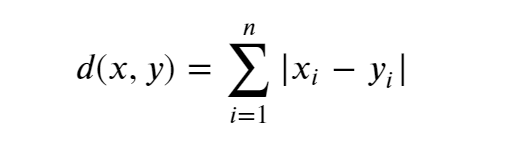

### Let's load required libraries


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

<div id="about_dataset">
    <h2>About the dataset</h2>
</div>



The target field, called **custcat**, has four possible values that correspond to the four customer groups, as follows:
<li>1- Basic Service
<li>2- E-Service
<li>3- Plus Service
<li>4- Total Service

Our objective is to build a KNN classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.


### Load Data From CSV File


In [3]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [4]:
df['custcat'].unique()

array([1, 4, 3, 2], dtype=int64)

In [5]:
class_1=df[df['custcat']==1]
len(class_1)

266

In [6]:
class_2=df[df['custcat']==2]
len(class_2)

217

In [7]:
class_3=df[df['custcat']==3]
len(class_3)

281

In [8]:
class_4=df[df['custcat']==4]
len(class_4)

236

In [9]:
class_1=df[df['custcat']==1]
len(class_1)

266

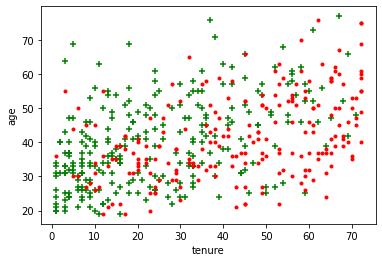

In [16]:
plt.xlabel('tenure')
plt.ylabel('age')
plt.scatter(class_1['tenure'], class_1['age'],color="green",marker='+')
plt.scatter(class_2['tenure'], class_2['age'],color="red",marker='.')

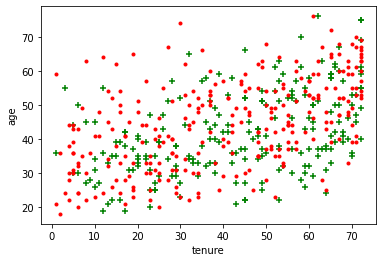

In [13]:
plt.xlabel('tenure')
plt.ylabel('age')
plt.scatter(class_2['tenure'], class_2['age'],color="green",marker='+')
plt.scatter(class_3['tenure'], class_3['age'],color="red",marker='.')

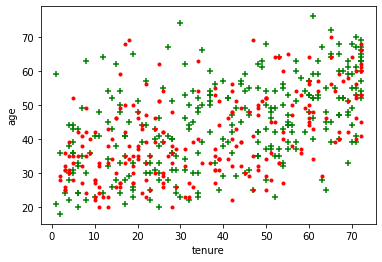

In [115]:
plt.xlabel('tenure')
plt.ylabel('age')
plt.scatter(class_3['tenure'], class_3['age'],color="green",marker='+')
plt.scatter(class_4['tenure'], class_4['age'],color="red",marker='.')

<div id="visualization_analysis">
    <h2>Data Visualization and Analysis</h2> 
</div>


#### Let’s see how many of each class is in our data set


In [116]:
bar=df['custcat'].value_counts()
bar

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [117]:
bar=bar.values
bar

array([281, 266, 236, 217], dtype=int64)

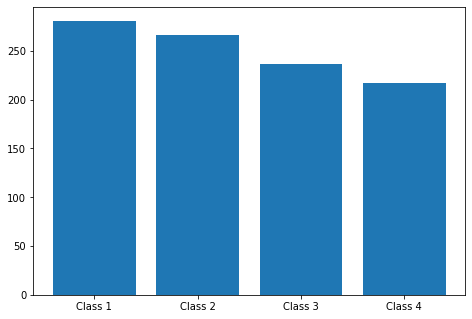

In [67]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Class 1', 'Class 2', 'Class 3', 'Class 4',]
# students = [23,17,35,29,12]
ax.bar(langs,bar)
plt.show()

#### 281 Plus Service, 266 Basic-service, 236 Total Service, and 217 E-Service customers


You can easily explore your data using visualization techniques:


array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

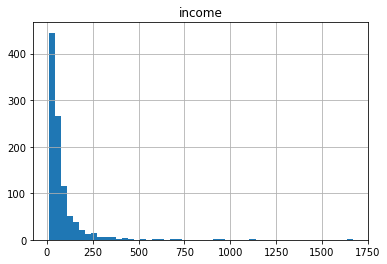

In [118]:
df.hist(column='income', bins=50)

### Feature set


Let's define feature sets, X:


In [119]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:


In [120]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]


array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

What are our labels?


In [121]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

## Normalize Data


Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:


In [122]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

### Train Test Split



In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


<div id="classification">
    <h2>Classification</h2>
</div>


<h3>K nearest neighbor (KNN)</h3>


#### Import library


Classifier implementing the k-nearest neighbors vote.


In [22]:
from sklearn.neighbors import KNeighborsClassifier

### Training

Let's start the algorithm with k=4 for now:


In [163]:
k = 2
#Train Model and Predict  
Model = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Model

KNeighborsClassifier(n_neighbors=2)

### Predicting

We can use the model to make predictions on the test set:


In [164]:
yhat = Model.predict(X_test)
yhat[0:5]

array([3, 1, 1, 2, 2], dtype=int64)

### Accuracy evaluation



In [165]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, Model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.6175
Test set Accuracy:  0.29


### Fit the best value of K

In [166]:
Ks = 37
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    Model = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=Model.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ,
       0.33 , 0.315, 0.34 , 0.33 , 0.315, 0.34 , 0.36 , 0.355, 0.35 ,
       0.345, 0.335, 0.35 , 0.36 , 0.37 , 0.365, 0.365, 0.365, 0.35 ,
       0.36 , 0.38 , 0.385, 0.395, 0.395, 0.38 , 0.37 , 0.365, 0.385])

In [167]:
X=np.arange(start=1, stop=37, step=1)
len(X)

36

#### Plot the model accuracy for a different number of neighbors.

The best accuracy was with 0.395 with k= 31


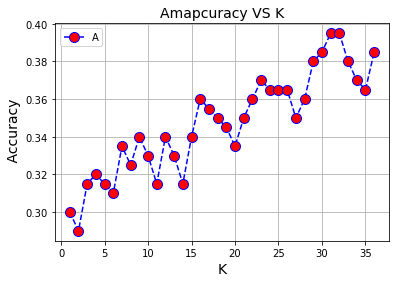

In [168]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 
##Accurecy Plot
plt.plot(X, mean_acc,color = 'blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Amapcuracy VS K', fontsize=14)
plt.legend(('Accuracy '))
plt.xlabel('K', fontsize=14)
plt.ylabel(' Accuracy', fontsize=14)
plt.grid(True)
plt.show()

In [169]:
from sklearn.metrics import confusion_matrix
y_pred = Model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[29,  1, 17,  4],
       [ 9, 13, 13,  9],
       [24,  6, 21,  3],
       [20,  6, 11, 14]], dtype=int64)

Text(42.0, 0.5, 'Truth')

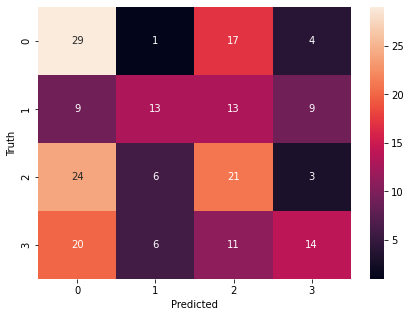

In [170]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [171]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.35      0.57      0.44        51
           2       0.50      0.30      0.37        44
           3       0.34      0.39      0.36        54
           4       0.47      0.27      0.35        51

    accuracy                           0.38       200
   macro avg       0.41      0.38      0.38       200
weighted avg       0.41      0.39      0.38       200



### How to find the accurcey
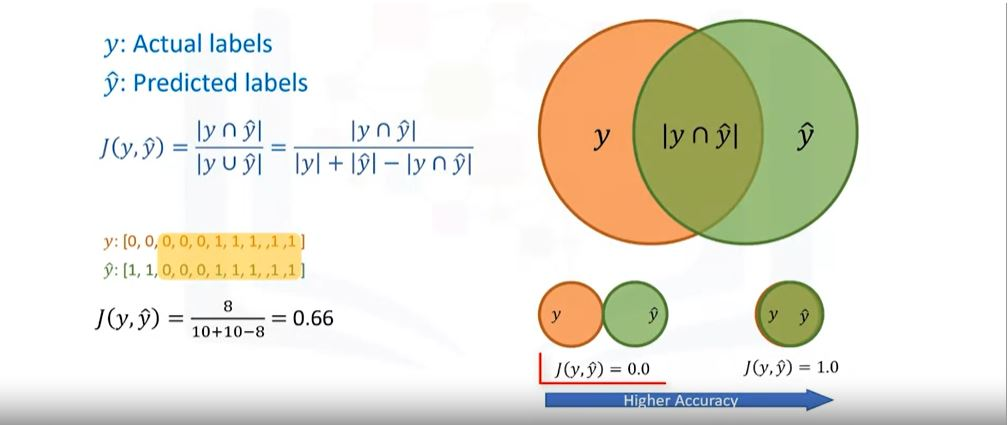

### Conclusion 
The best accuracy was with 0.395 with k= 31